In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json
from matplotlib import rcParams

plt.rc('font', size=6)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=6)
rcParams['font.family'] = "sans-serif"
rcParams['font.sans-serif'] = "Helvetica"

cm = 1 / 2.54

In [66]:
experiment_folder = '../results/experiment9/'

In [67]:
exps = [x[0] for x in os.walk(experiment_folder)]
exps

['../results/experiment9/',
 '../results/experiment9/p1000n10000',
 '../results/experiment9/p100n10',
 '../results/experiment9/p100n10000',
 '../results/experiment9/p100n1000',
 '../results/experiment9/p100n100',
 '../results/experiment9/p10n10000',
 '../results/experiment9/p1000n1000',
 '../results/experiment9/p1000n10',
 '../results/experiment9/p1000n100',
 '../results/experiment9/p10n100',
 '../results/experiment9/p10n1000',
 '../results/experiment9/p10n10']

In [68]:
exps.remove(experiment_folder)

In [69]:
errors_mean = []
errors_cov = []
labels = []
times_mc = []
times_vipurpca = []
ns = []
ps = []
n_iter = []
pca = []
for e in exps: 
    with open(e+'/experiment.json', 'r') as f:
        d = json.load(f)
    ns.append(d['n'])
    ps.append(d['p'])
    labels.append('p=' + str(d['p']) + ', n=' + str(d['n']))
    errors_mean.append(np.load(e+'/errors_mean.npy'))
    errors_cov.append(np.load(e+'/errors_cov.npy'))
    times_mc.append(np.load(e+'/times_mc.npy'))
    times_vipurpca.append(np.load(e+'/times_vipurpca.npy'))
    #pca.append(np.load(e+'/mean_vipurpca.npy'))
    n_iter.append(d['n_iter'])

In [110]:
errors_mean_mean = [np.mean(i, axis=0) for i in errors_mean]
errors_cov_mean = [np.mean(i, axis=0) for i in errors_cov]
errors_cov_std = [np.std(i, axis=0) for i in errors_cov]
errors_mean_std = [np.std(i, axis=0) for i in errors_mean]
times_mc_mean = [np.mean(i, axis=0) for i in times_mc]
times_mc_std = [np.std(i, axis=0) for i in times_mc]
times_vipurpca_mean = [np.mean(i, axis=0) for i in times_vipurpca]
r = [int(i) for i in np.logspace(1, np.log2(n_iter[0]), num=20, base=2)]

In [94]:
print(ns)
print(ps)
print(times_mc_mean)
print(times_vipurpca_mean)
print(len(ns))
print(n_iter)

[10000, 10, 10000, 1000, 100, 10000, 1000, 10, 100, 100, 1000, 10]
[1000, 100, 100, 100, 100, 10, 1000, 1000, 1000, 10, 10, 10]
[27746.596, 2.885672, 1268.3256, 347.3835, 129.57607, 138.99234, 12971.536, 26.328619, 853.0954, 2.0477822, 8.205429, 0.5976331]
[1183.7977, 0.09910178, 10.094465, 0.7858174, 0.16928506, 0.8343458, 88.77452, 0.9694402, 7.540318, 0.041766882, 0.06308818, 0.01598382]
12
[16384, 16384, 16384, 16384, 16384, 16384, 16384, 16384, 16384, 16384, 16384, 16384]


In [95]:
print(errors_cov_mean[0], errors_cov_std[0], (np.array(errors_cov_mean)-np.array(errors_cov_std))[0])

[0.96044075 1.1405759  0.8214619  0.61705345 0.14834556 0.4487534
 0.38224787 0.35949397 0.20179124 0.16145466 0.2181999  0.1419088
 0.0967989  0.10153745 0.07818046 0.07671237 0.06697852 0.06945503
 0.08240886 0.06771184] [0.21419375 0.19516274 0.14997242 0.18375263 0.19736508 0.2066578
 0.2709267  0.27686808 0.3099382  0.33600685 0.32940963 0.32509008
 0.334206   0.35002595 0.36992443 0.37661538 0.37697035 0.37078676
 0.37119725 0.3705475 ] [ 0.746247    0.9454131   0.6714895   0.43330082 -0.04901952  0.24209559
  0.11132115  0.0826259  -0.10814695 -0.17455219 -0.11120974 -0.18318129
 -0.23740712 -0.2484885  -0.29174396 -0.299903   -0.30999184 -0.30133173
 -0.28878838 -0.30283567]


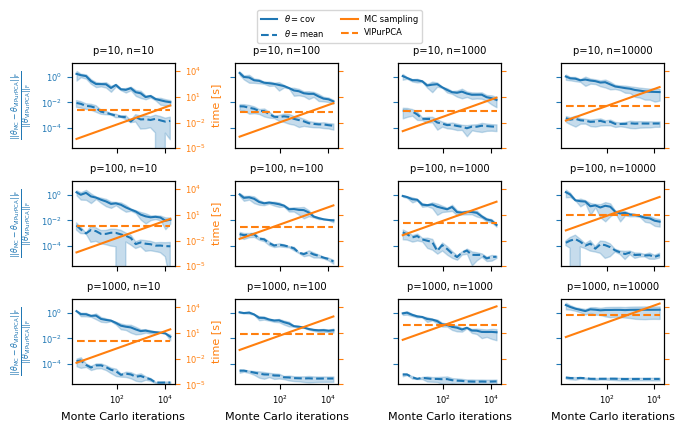

In [129]:
fig, axs = plt.subplots(len(set(ps)), len(set(ns)), sharex=True, sharey=True, figsize=(17.2*cm, 10*cm))
axes = axs.ravel()
twinxes = []
for i, exp in enumerate(sorted(range(len(ns)), key=lambda k: (ps[k], ns[k]))):
    t_mc = times_mc_mean[exp]
    t_mc_per_iteration = t_mc/n_iter[exp]
    t_mc_plot = [i*t_mc_per_iteration for i in r]
    cov, = axes[i].plot(r, errors_cov_mean[exp], label=r'$\theta=\mathrm{cov}$')
    axes[i].fill_between(x=r, y1=errors_cov_mean[exp]-errors_cov_std[exp], y2=errors_cov_mean[exp]+errors_cov_std[exp], alpha=.25, color='C0')
    mean, = axes[i].plot(r, errors_mean_mean[exp], '--', label=r'$\theta=\mathrm{mean}$', c='C0')
    axes[i].fill_between(x=r, y1=errors_mean_mean[exp]-errors_mean_std[exp], y2=errors_mean_mean[exp]+errors_mean_std[exp], alpha=.25, color='C0')    
    axes[i].set_yscale('log', base=10)
    axes[i].set_xscale('log', base=10)
    axes[i].set_ylabel(r'$\frac{||\theta_{\mathrm{MC}}-\theta_{\mathrm{VIPurPCA}}||_{\mathrm{F}}}{||\theta_{\mathrm{VIPurPCA}}||_{\mathrm{F}}}$', color='C0')
    axes[i].set_xlabel('Monte Carlo iterations')
    axes[i].tick_params(axis='y', colors='C0')
    #axes[i].set_xlim(229, 16384)
    twinx = axes[i].twinx()
    time_mc, = twinx.plot(r, t_mc_plot, '-', label='MC sampling', c='C1')
    time_vipurpca, = twinx.plot(r, [times_vipurpca_mean[exp] for i in r], '--', label='VIPurPCA', c='C1')
    twinx.set_yscale('log', base=10)
    twinx.set_xscale('log', base=10)
    twinx.set_ylabel('time [s]', color='C1')
    twinx.set_ylim(0.00001, 100000)
    twinx.tick_params(axis='y', colors='C1')
    #twinx.set_xlim(229, 16384)
    plt.title(labels[exp])
    #plt.legend(handles=[cov, mean, time_mc, time_vipurpca])
    twinxes.append(twinx)
    #plt.close()
fig.legend(handles=[cov, mean, time_mc, time_vipurpca], loc='upper center', fontsize=6, bbox_to_anchor=(0.5, 1.08), ncol=2)
for ax in axes:
    ax.label_outer()
for ax in twinxes:
    ax.label_outer()
plt.tight_layout()
plt.savefig(experiment_folder + 'MCvsVIPURPCA.pdf', bbox_inches='tight')

In [2]:
experiment_folder = '../results/runtime/'
exps = [x[0] for x in os.walk(experiment_folder)]
exps.remove(experiment_folder)
exps.remove('../results/runtime/.ipynb_checkpoints')

In [3]:
labels = []
times_vipurpca = []
ns = []
ps = []
n_iter = []
pca = []
for e in exps: 
    with open(e+'/experiment.json', 'r') as f:
        d = json.load(f)
    ns.append(d['n'])
    ps.append(d['p'])
    labels.append('p=' + str(d['p']) + ', n=' + str(d['n']))
    times_vipurpca.append(np.load(e+'/times_vipurpca.npy'))
    #pca.append(np.load(e+'/mean_vipurpca.npy'))
    n_iter.append(d['n_iter'])

In [4]:
times_vipurpca_mean = [np.mean(i, axis=0) for i in times_vipurpca]
r = [int(i) for i in np.logspace(1, np.log2(n_iter[0]), num=20, base=2)]

In [5]:
n_set = sorted(list(set(ns)))
p_set = sorted(list(set(ps)))
t_vipurpca_flat = np.array([times_vipurpca_mean[exp] for i, exp in enumerate(sorted(range(len(ns)), key=lambda k: (ps[k], ns[k])))])
t_vipurpca_reshape = t_vipurpca_flat.reshape(len(p_set), len(n_set))
t_vipurpca_flat2 = np.array([times_vipurpca_mean[exp] for i, exp in enumerate(sorted(range(len(ns)), key=lambda k: (ns[k], ps[k])))])
t_vipurpca_reshape2 = t_vipurpca_flat2.reshape(len(n_set), len(p_set))
#t_mc_flat = np.array([times_mc_mean[exp] for i, exp in enumerate(sorted(range(len(ns)), key=lambda k: (ps[k], ns[k])))])
#t_mc_reshape = t_mc_flat.reshape(len(p_set), len(n_set))
#t_mc_flat2 = np.array([times_mc_mean[exp] for i, exp in enumerate(sorted(range(len(ns)), key=lambda k: (ns[k], ps[k])))])
#t_mc_reshape2 = t_mc_flat2.reshape(len(n_set), len(p_set))
    

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


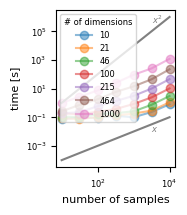

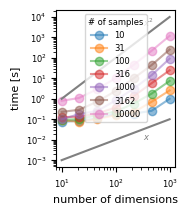

In [6]:
fig = plt.figure(figsize=(4.3*cm, 5*cm), tight_layout = {'pad': 0.1})
for i, j in enumerate(t_vipurpca_reshape):
    plt.plot(n_set, j, marker='o', alpha=0.5, label=str(p_set[i]))
    #ax1.plot(n_set, t_mc_reshape[i], '--', label=str(p_set[i]), c='C'+str(i))
    plt.yscale('log', base=10)
    plt.xscale('log', base=10) 
    plt.xlabel('number of samples')
    plt.ylabel('time [s]')
plt.legend(title='# of dimensions', fontsize=6)
plt.plot(n_set, np.array(n_set)/10**5, c='grey')
plt.plot(n_set, np.array(n_set)**2/10**2, c='grey')
plt.text(10 ** 3.5, 10 ** 5.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
plt.text(10 ** 3.5, 10 ** -2, 'x', c='grey', fontsize=6, fontstyle='italic')
plt.savefig(experiment_folder+'sample_runtime.pdf')
fig = plt.figure(figsize=(4.3*cm, 5*cm), tight_layout = {'pad': 0.1})
for i, j in enumerate(t_vipurpca_reshape2):
    plt.plot(p_set, j, marker='o', alpha=0.5, label=str(n_set[i]))
    #ax2.plot(p_set, t_mc_reshape2[i], '--', label=str(n_set[i]), c='C'+str(i))
    plt.yscale('log', base=10)
    plt.xscale('log', base=10) 
    plt.xlabel('number of dimensions')
    plt.ylabel('time [s]')
plt.legend(title='# of samples', fontsize=6)
plt.plot(p_set, np.array(p_set)/10**4, c='grey')
plt.plot(p_set, np.array(p_set)**2/10**2, c='grey')
plt.text(10 ** 2.5, 10 ** 3.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
plt.text(10 ** 2.5, 10 ** -2, '$x$', c='grey', fontsize=6, fontstyle='italic')
plt.savefig(experiment_folder+'dimension_runtime.pdf')

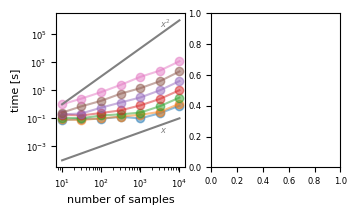

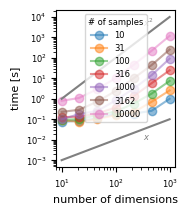

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.6*cm, 5*cm), tight_layout = {'pad': 0.1})
for i, j in enumerate(t_vipurpca_reshape):
    ax1.plot(n_set, j, marker='o', alpha=0.5, label=str(p_set[i]))
    #ax1.plot(n_set, t_mc_reshape[i], '--', label=str(p_set[i]), c='C'+str(i))
    ax1.set_yscale('log', base=10)
    ax1.set_xscale('log', base=10) 
    ax1.set_xlabel('number of samples')
    ax1.set_ylabel('time [s]')
#ax1.legend(title='# of dimensions', fontsize=6)
ax1.plot(n_set, np.array(n_set)/10**5, c='grey')
ax1.plot(n_set, np.array(n_set)**2/10**2, c='grey')
ax1.text(10 ** 3.5, 10 ** 5.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
ax1.text(10 ** 3.5, 10 ** -2, 'x', c='grey', fontsize=6, fontstyle='italic')
# Shrink current axis's height by 10% on the bottom
#box = ax.get_position()
#ax.set_position([box.x0, box.y0 + box.height * 0.1,
#                 box.width, box.height * 0.9])

# Put a legend below current axis
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#          fancybox=True, shadow=True, ncol=5)
plt.savefig(experiment_folder+'sample_runtime.pdf')
fig = plt.figure(figsize=(4.3*cm, 5*cm), tight_layout = {'pad': 0.1})
for i, j in enumerate(t_vipurpca_reshape2):
    plt.plot(p_set, j, marker='o', alpha=0.5, label=str(n_set[i]))
    #ax2.plot(p_set, t_mc_reshape2[i], '--', label=str(n_set[i]), c='C'+str(i))
    plt.yscale('log', base=10)
    plt.xscale('log', base=10) 
    plt.xlabel('number of dimensions')
    plt.ylabel('time [s]')
plt.legend(title='# of samples', fontsize=6)
plt.plot(p_set, np.array(p_set)/10**4, c='grey')
plt.plot(p_set, np.array(p_set)**2/10**2, c='grey')
plt.text(10 ** 2.5, 10 ** 3.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
plt.text(10 ** 2.5, 10 ** -2, '$x$', c='grey', fontsize=6, fontstyle='italic')
plt.savefig(experiment_folder+'dimension_runtime.pdf')

In [2]:
experiment_folder = '../results/runtime_mc/'
exps = [x[0] for x in os.walk(experiment_folder)]
exps.remove(experiment_folder)
exps.remove('../results/runtime_mc/.ipynb_checkpoints')

In [3]:
labels = []
times_mc = []
ns = []
ps = []
n_iter = []
pca = []
for e in exps: 
    with open(e+'/experiment.json', 'r') as f:
        d = json.load(f)
    ns.append(d['n'])
    ps.append(d['p'])
    labels.append('p=' + str(d['p']) + ', n=' + str(d['n']))
    times_mc.append(np.load(e+'/times_mc.npy'))
    #pca.append(np.load(e+'/mean_vipurpca.npy'))
    n_iter.append(d['n_iter'])

In [4]:
times_mc_mean = [np.mean(i, axis=0) for i in times_mc]
r = [int(i) for i in np.logspace(1, np.log2(n_iter[0]), num=20, base=2)]

In [5]:
n_set = sorted(list(set(ns)))
p_set = sorted(list(set(ps)))
t_mc_flat = np.array([times_mc_mean[exp] for i, exp in enumerate(sorted(range(len(ns)), key=lambda k: (ps[k], ns[k])))])
t_mc_reshape = t_mc_flat.reshape(len(p_set), len(n_set))
t_mc_flat2 = np.array([times_mc_mean[exp] for i, exp in enumerate(sorted(range(len(ns)), key=lambda k: (ns[k], ps[k])))])
t_mc_reshape2 = t_mc_flat2.reshape(len(n_set), len(p_set))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


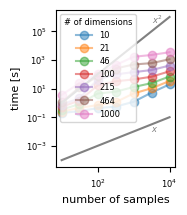

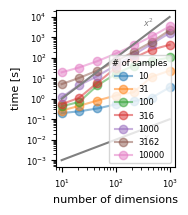

In [6]:
fig = plt.figure(figsize=(4.3*cm, 5*cm), tight_layout = {'pad': 0.1})
for i, j in enumerate(t_mc_reshape):
    plt.plot(n_set, j, marker='o', alpha=0.5, label=str(p_set[i]))
    #ax1.plot(n_set, t_mc_reshape[i], '--', label=str(p_set[i]), c='C'+str(i))
    plt.yscale('log', base=10)
    plt.xscale('log', base=10) 
    plt.xlabel('number of samples')
    plt.ylabel('time [s]')
plt.legend(title='# of dimensions', fontsize=6)
plt.plot(n_set, np.array(n_set)/10**5, c='grey')
plt.plot(n_set, np.array(n_set)**2/10**2, c='grey')
plt.text(10 ** 3.5, 10 ** 5.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
plt.text(10 ** 3.5, 10 ** -2, 'x', c='grey', fontsize=6, fontstyle='italic')
plt.savefig(experiment_folder+'sample_runtime_mc.pdf')
fig = plt.figure(figsize=(4.3*cm, 5*cm), tight_layout = {'pad': 0.1})
for i, j in enumerate(t_mc_reshape2):
    plt.plot(p_set, j, marker='o', alpha=0.5, label=str(n_set[i]))
    #ax2.plot(p_set, t_mc_reshape2[i], '--', label=str(n_set[i]), c='C'+str(i))
    plt.yscale('log', base=10)
    plt.xscale('log', base=10) 
    plt.xlabel('number of dimensions')
    plt.ylabel('time [s]')
plt.legend(title='# of samples', fontsize=6)
plt.plot(p_set, np.array(p_set)/10**4, c='grey')
plt.plot(p_set, np.array(p_set)**2/10**2, c='grey')
plt.text(10 ** 2.5, 10 ** 3.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
plt.text(10 ** 2.5, 10 ** -2, '$x$', c='grey', fontsize=6, fontstyle='italic')
plt.savefig(experiment_folder+'dimension_runtime_mc.pdf')

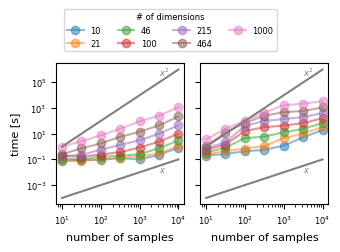

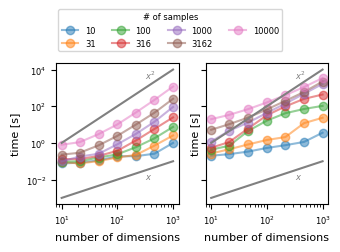

In [154]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.6*cm, 5*cm), tight_layout = {'pad': 0.1}, sharey=True)
for i, j in enumerate(t_vipurpca_reshape):
    ax1.plot(n_set, j, marker='o', alpha=0.5, label=str(p_set[i]))
    #ax1.plot(n_set, t_mc_reshape[i], '--', label=str(p_set[i]), c='C'+str(i))
    ax1.set_yscale('log', base=10)
    ax1.set_xscale('log', base=10) 
    ax1.set_xlabel('number of samples')
    ax1.set_ylabel('time [s]')
#ax1.legend(title='# of dimensions', fontsize=6)
ax1.plot(n_set, np.array(n_set)/10**5, c='grey')
ax1.plot(n_set, np.array(n_set)**2/10**2, c='grey')
ax1.text(10 ** 3.5, 10 ** 5.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
ax1.text(10 ** 3.5, 10 ** -2, 'x', c='grey', fontsize=6, fontstyle='italic')

for i, j in enumerate(t_mc_reshape):
    ax2.plot(n_set, j, marker='o', alpha=0.5, label=str(p_set[i]))
    #ax1.plot(n_set, t_mc_reshape[i], '--', label=str(p_set[i]), c='C'+str(i))
    ax2.set_yscale('log', base=10)
    ax2.set_xscale('log', base=10) 
    ax2.set_xlabel('number of samples')
    ax2.set_ylabel('time [s]')
ax2.plot(n_set, np.array(n_set)/10**5, c='grey')
ax2.plot(n_set, np.array(n_set)**2/10**2, c='grey')
ax2.text(10 ** 3.5, 10 ** 5.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
ax2.text(10 ** 3.5, 10 ** -2, 'x', c='grey', fontsize=6, fontstyle='italic')
ax2.label_outer()
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='# of dimensions', fontsize=6, ncol=4, bbox_to_anchor=(0.5, 1.25))
plt.savefig('../results/' + 'runtime_samples.pdf', bbox_inches='tight')

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(8.6*cm, 5*cm), tight_layout = {'pad': 0.1}, sharey=True)
for i, j in enumerate(t_mc_reshape2):
    ax1.plot(p_set, j, marker='o', alpha=0.5, label=str(n_set[i]))
    #ax2.plot(p_set, t_mc_reshape2[i], '--', label=str(n_set[i]), c='C'+str(i))
    ax1.set_yscale('log', base=10)
    ax1.set_xscale('log', base=10) 
    ax1.set_xlabel('number of dimensions')
    ax1.set_ylabel('time [s]')
ax1.plot(p_set, np.array(p_set)/10**4, c='grey')
ax1.plot(p_set, np.array(p_set)**2/10**2, c='grey')
ax1.text(10 ** 2.5, 10 ** 3.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
ax1.text(10 ** 2.5, 10 ** -2, '$x$', c='grey', fontsize=6, fontstyle='italic')
for i, j in enumerate(t_vipurpca_reshape2):
    ax2.plot(p_set, j, marker='o', alpha=0.5, label=str(n_set[i]))
    #ax2.plot(p_set, t_mc_reshape2[i], '--', label=str(n_set[i]), c='C'+str(i))
    ax2.set_yscale('log', base=10)
    ax2.set_xscale('log', base=10) 
    ax2.set_xlabel('number of dimensions')
    ax2.set_ylabel('time [s]')
ax2.plot(p_set, np.array(p_set)/10**4, c='grey')
ax2.plot(p_set, np.array(p_set)**2/10**2, c='grey')
ax2.text(10 ** 2.5, 10 ** 3.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
ax2.text(10 ** 2.5, 10 ** -2, '$x$', c='grey', fontsize=6, fontstyle='italic')
handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', title='# of samples', fontsize=6, ncol=4, bbox_to_anchor=(0.5, 1.25))
plt.savefig('../results/' + 'runtime_dimensions.pdf', bbox_inches='tight')

In [7]:
experiment_folder = '../results/memory_vipurpca/'
exps = [x[0] for x in os.walk(experiment_folder)]
exps.remove(experiment_folder)
exps.remove('../results/memory_vipurpca/.ipynb_checkpoints')

In [8]:
labels = []
memory_vipurpca = []
ns = []
ps = []
n_iter = []
pca = []
for e in exps: 
    with open(e+'/experiment.json', 'r') as f:
        d = json.load(f)
    ns.append(d['n'])
    ps.append(d['p'])
    labels.append('p=' + str(d['p']) + ', n=' + str(d['n']))
    memory_vipurpca.append(np.load(e+'/memories_vipurpca.npy'))
    #pca.append(np.load(e+'/mean_vipurpca.npy'))
    n_iter.append(d['n_iter'])

In [9]:
memory_vipurpca_mean = [np.mean(i, axis=0) for i in memory_vipurpca]
n_set = sorted(list(set(ns)))
p_set = sorted(list(set(ps)))
memory_vipurpca_flat = np.array([memory_vipurpca_mean[exp] for i, exp in enumerate(sorted(range(len(ns)), key=lambda k: (ps[k], ns[k])))])/1024
memory_vipurpca_reshape = memory_vipurpca_flat.reshape(len(p_set), len(n_set))
memory_vipurpca_flat2 = np.array([memory_vipurpca_mean[exp] for i, exp in enumerate(sorted(range(len(ns)), key=lambda k: (ns[k], ps[k])))])/1024
memory_vipurpca_reshape2 = memory_vipurpca_flat2.reshape(len(n_set), len(p_set))

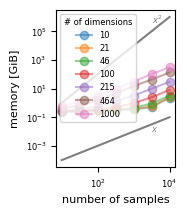

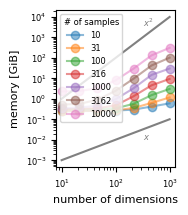

In [13]:
fig = plt.figure(figsize=(4.3*cm, 5*cm), tight_layout = {'pad': 0.1})
for i, j in enumerate(memory_vipurpca_reshape):
    plt.plot(n_set, j, marker='o', alpha=0.5, label=str(p_set[i]))
    #ax1.plot(n_set, t_mc_reshape[i], '--', label=str(p_set[i]), c='C'+str(i))
    plt.yscale('log', base=10)
    plt.xscale('log', base=10) 
    plt.xlabel('number of samples')
    plt.ylabel('memory [GiB]')
plt.legend(title='# of dimensions', fontsize=6, loc='upper left')
plt.plot(n_set, np.array(n_set)/10**5, c='grey')
plt.plot(n_set, np.array(n_set)**2/10**2, c='grey')
plt.text(10 ** 3.5, 10 ** 5.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
plt.text(10 ** 3.5, 10 ** -2, 'x', c='grey', fontsize=6, fontstyle='italic')
plt.savefig(experiment_folder+'sample_memory_vipurpca.pdf')
fig = plt.figure(figsize=(4.3*cm, 5*cm), tight_layout = {'pad': 0.1})
for i, j in enumerate(memory_vipurpca_reshape2):
    plt.plot(p_set, j, marker='o', alpha=0.5, label=str(n_set[i]))
    #ax2.plot(p_set, t_mc_reshape2[i], '--', label=str(n_set[i]), c='C'+str(i))
    plt.yscale('log', base=10)
    plt.xscale('log', base=10) 
    plt.xlabel('number of dimensions')
    plt.ylabel('memory [GiB]')
plt.legend(title='# of samples', fontsize=6, loc='upper left')
plt.plot(p_set, np.array(p_set)/10**4, c='grey')
plt.plot(p_set, np.array(p_set)**2/10**2, c='grey')
plt.text(10 ** 2.5, 10 ** 3.5, r'$x^2$', c='grey', fontsize=6, fontstyle='italic')
plt.text(10 ** 2.5, 10 ** -2, '$x$', c='grey', fontsize=6, fontstyle='italic')
plt.savefig(experiment_folder+'dimensions_memory_vipurpca.pdf')